# Facial Recognition Using Eigenfaces

# Training

### Importing Libraries

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as im

### Load Test Data

In [2]:
# neutral face
neutral = []

folder_path = "D:\Work\Dev\Face-Recognition-using-eigen-faces\TrainNew"

for i in range(45):
    i += 1
    file_path = f"{i}.jpg"
    img = im.open(os.path.join(folder_path, file_path)).convert('L')
    img = img.resize((100,100), im.ANTIALIAS)
    img2 = np.array(img).flatten() # vectorization
    neutral.append(img2)

C:\Users\aryan\AppData\Local\Temp\ipykernel_32596\845131299.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((100,100), im.ANTIALIAS)


In [3]:
faces_matrix = np.vstack(neutral)
faces_matrix.shape

(45, 10000)

In [4]:
mean_face = np.mean(faces_matrix, axis=0)
mean_face.shape

(10000,)

Text(0.5, 1.0, 'Mean Face')

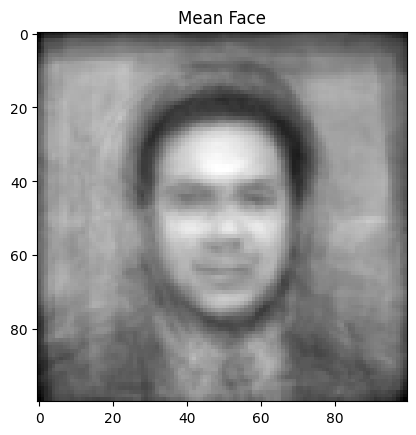

In [5]:
plt.imshow(mean_face.reshape(100,100),cmap='gray'); 
plt.title('Mean Face')

### Normalization

In [6]:
faces_norm = faces_matrix - mean_face
faces_norm.shape

(45, 10000)

### Compute Covariance Matrix

In [7]:
face_cov = np.cov(faces_norm.T)
face_cov.shape

(10000, 10000)

### Get Eigenvectors

In [8]:
eigen_vecs, eigen_vals, _ = np.linalg.svd(face_cov)
eigen_vecs.shape

(10000, 10000)

### Visualizing the first 10 Eigenfaces

C:\Users\aryan\AppData\Local\Temp\ipykernel_32596\2802332386.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2,5,i+1)


Text(0.5, 0.98, 'First 10 Eigenfaces')

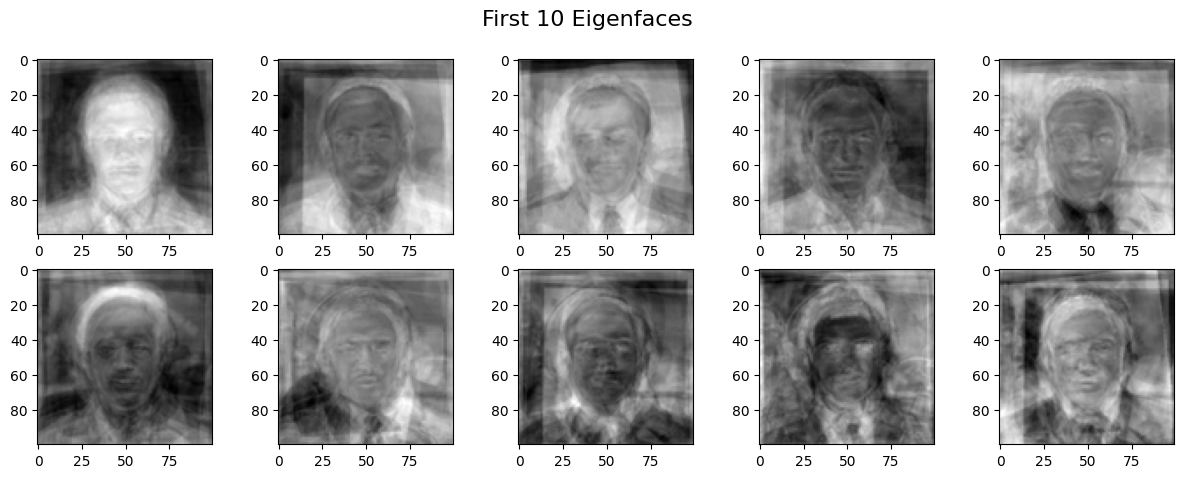

In [10]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs[:,i].reshape(100,100)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)

### Reconstruction with Eigenfaces

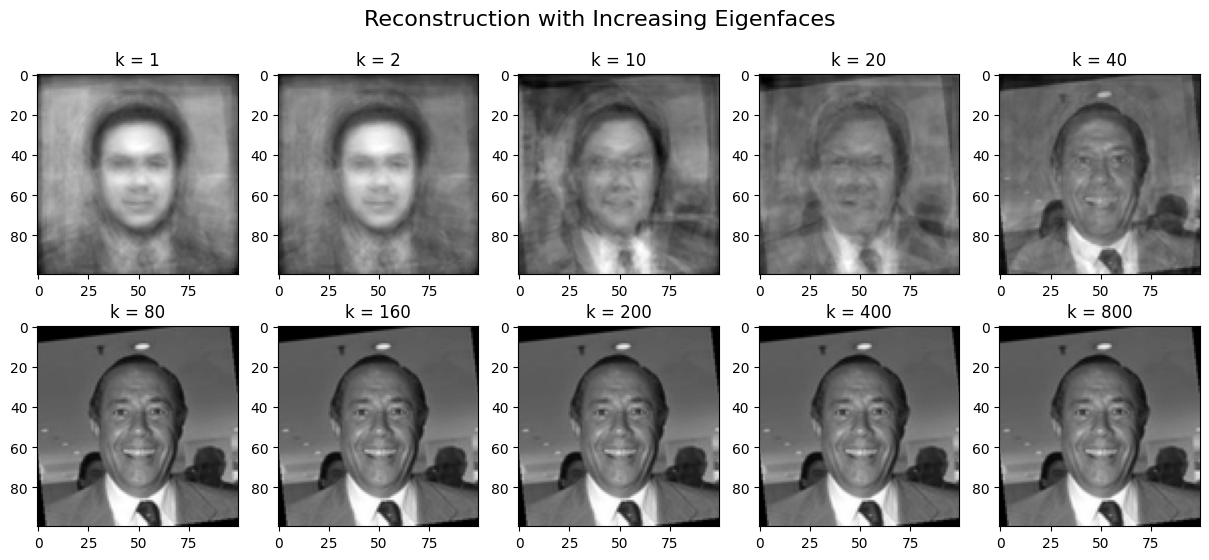

In [11]:
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    weight = faces_norm[40,:].dot(eigen_vecs[:,:k])
    projected_face = weight.dot(eigen_vecs[:,:k].T)
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(100,100)+mean_face.reshape(100,100),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16);

# Testing

### Load Test Image

In [22]:
image_path = input('Enter the path of the image you want to test with: ')

Enter the path of the image you want to test with: D:\Work\Dev\Face-Recognition-using-eigen-faces\TrainNew\4.jpg


In [23]:
img = im.open(image_path).convert('L')
img = img.resize((100,100), im.ANTIALIAS)
img2 = np.array(img).flatten()
input_face_norm = img2 - mean_face

C:\Users\aryan\AppData\Local\Temp\ipykernel_32596\1697754555.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((100,100), im.ANTIALIAS)


### Calculate weights of Input Image

In [24]:
input_weights = input_face_norm.dot(eigen_vecs)

### Compare input weights to training weights using Euclidean distance

In [25]:
distances = np.linalg.norm(faces_norm.dot(eigen_vecs) - input_weights, axis=1)
print(distances)

[7.48636501e+03 7.04871251e+03 1.46153337e+04 9.30266262e-12
 1.41467544e+04 9.77391119e+03 6.37363836e+03 8.01274990e+03
 9.17359139e+03 9.39301757e+03 7.39778433e+03 1.30456449e+04
 6.15283162e+03 1.23576236e+04 7.72410441e+03 9.20532835e+03
 7.68431962e+03 1.34122889e+04 1.44111566e+04 6.57490000e+03
 1.24090714e+04 9.58900078e+03 1.02185545e+04 1.15916942e+04
 5.37102439e+03 7.40152856e+03 9.76839864e+03 9.34174978e+03
 1.29977817e+04 1.14720337e+04 6.26404709e+03 6.64036181e+03
 7.34618282e+03 7.15105580e+03 6.52783739e+03 8.46769278e+03
 6.21759045e+03 7.58040639e+03 1.12652795e+04 9.20616994e+03
 6.55349540e+03 1.28920532e+04 6.66876810e+03 4.68804703e+03
 1.30241640e+04]


### Identify closest match

In [26]:
min_index = np.argmin(distances)
label = f"{min_index+1}.jpg"

### Threshold Distance

In [27]:
threshold_distance = 1000

### Display closest match

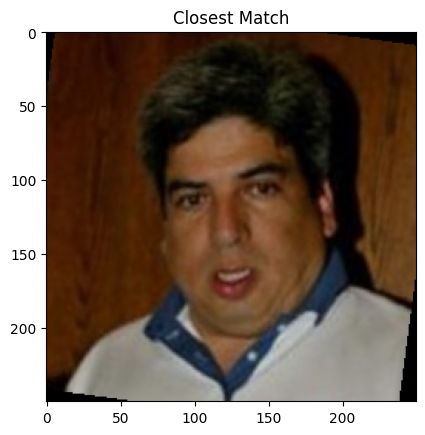

In [28]:
closest_match_idx = np.argmin(distances)
if distances[closest_match_idx] < threshold_distance:
    # display the closest match
    closest_match_path = os.path.join(folder_path, str(closest_match_idx+1)+".jpg")
    closest_match = im.open(closest_match_path)
    plt.imshow(closest_match)
    plt.title('Closest Match')
    plt.show()
else:
    # display "unknown"
    print("Unknown")